<a href="https://colab.research.google.com/github/RiteshopShrivastava/Multi_Linear_Regression/blob/main/Assignment_5_MLR_Toyota_Corolla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider only the below columns and prepare a prediction model for predicting Price.

("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Read the data
toyota_data = pd.read_csv("/content/ToyotaCorolla.csv", encoding= 'unicode_escape')
toyota_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [3]:
toyota_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

# **EDA**

In [4]:
toyota_temp = pd.concat([toyota_data.iloc[:,2:4], toyota_data.iloc[:,6],toyota_data.iloc[:,8], toyota_data.iloc[:,12:14],toyota_data.iloc[:,15:18]], axis=1)
toyota_temp

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
toyota1 = toyota_temp.rename({'Age_08_04':'Age', 'cc':'Cylinder_vol', 'Quarterly_Tax': 'Q_tax'}, axis=1)
toyota1

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
#check for missing values
toyota1.isna().sum()

Price           0
Age             0
KM              0
HP              0
Cylinder_vol    0
Doors           0
Gears           0
Q_tax           0
Weight          0
dtype: int64

In [7]:
toyota1[toyota1.duplicated()]

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [8]:
toyota1.shape


(1436, 9)

In [9]:
toyota2= toyota1
toyota2 = toyota2.drop_duplicates().reset_index()

In [10]:
toyota2

,index,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [11]:
toyota2= toyota2.drop(['index'], axis=1)
toyota2

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# Correlation Matrix

In [12]:
toyota2.corr()

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
Cylinder_vol,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Q_tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


# Scatterplot between variables along with histograms

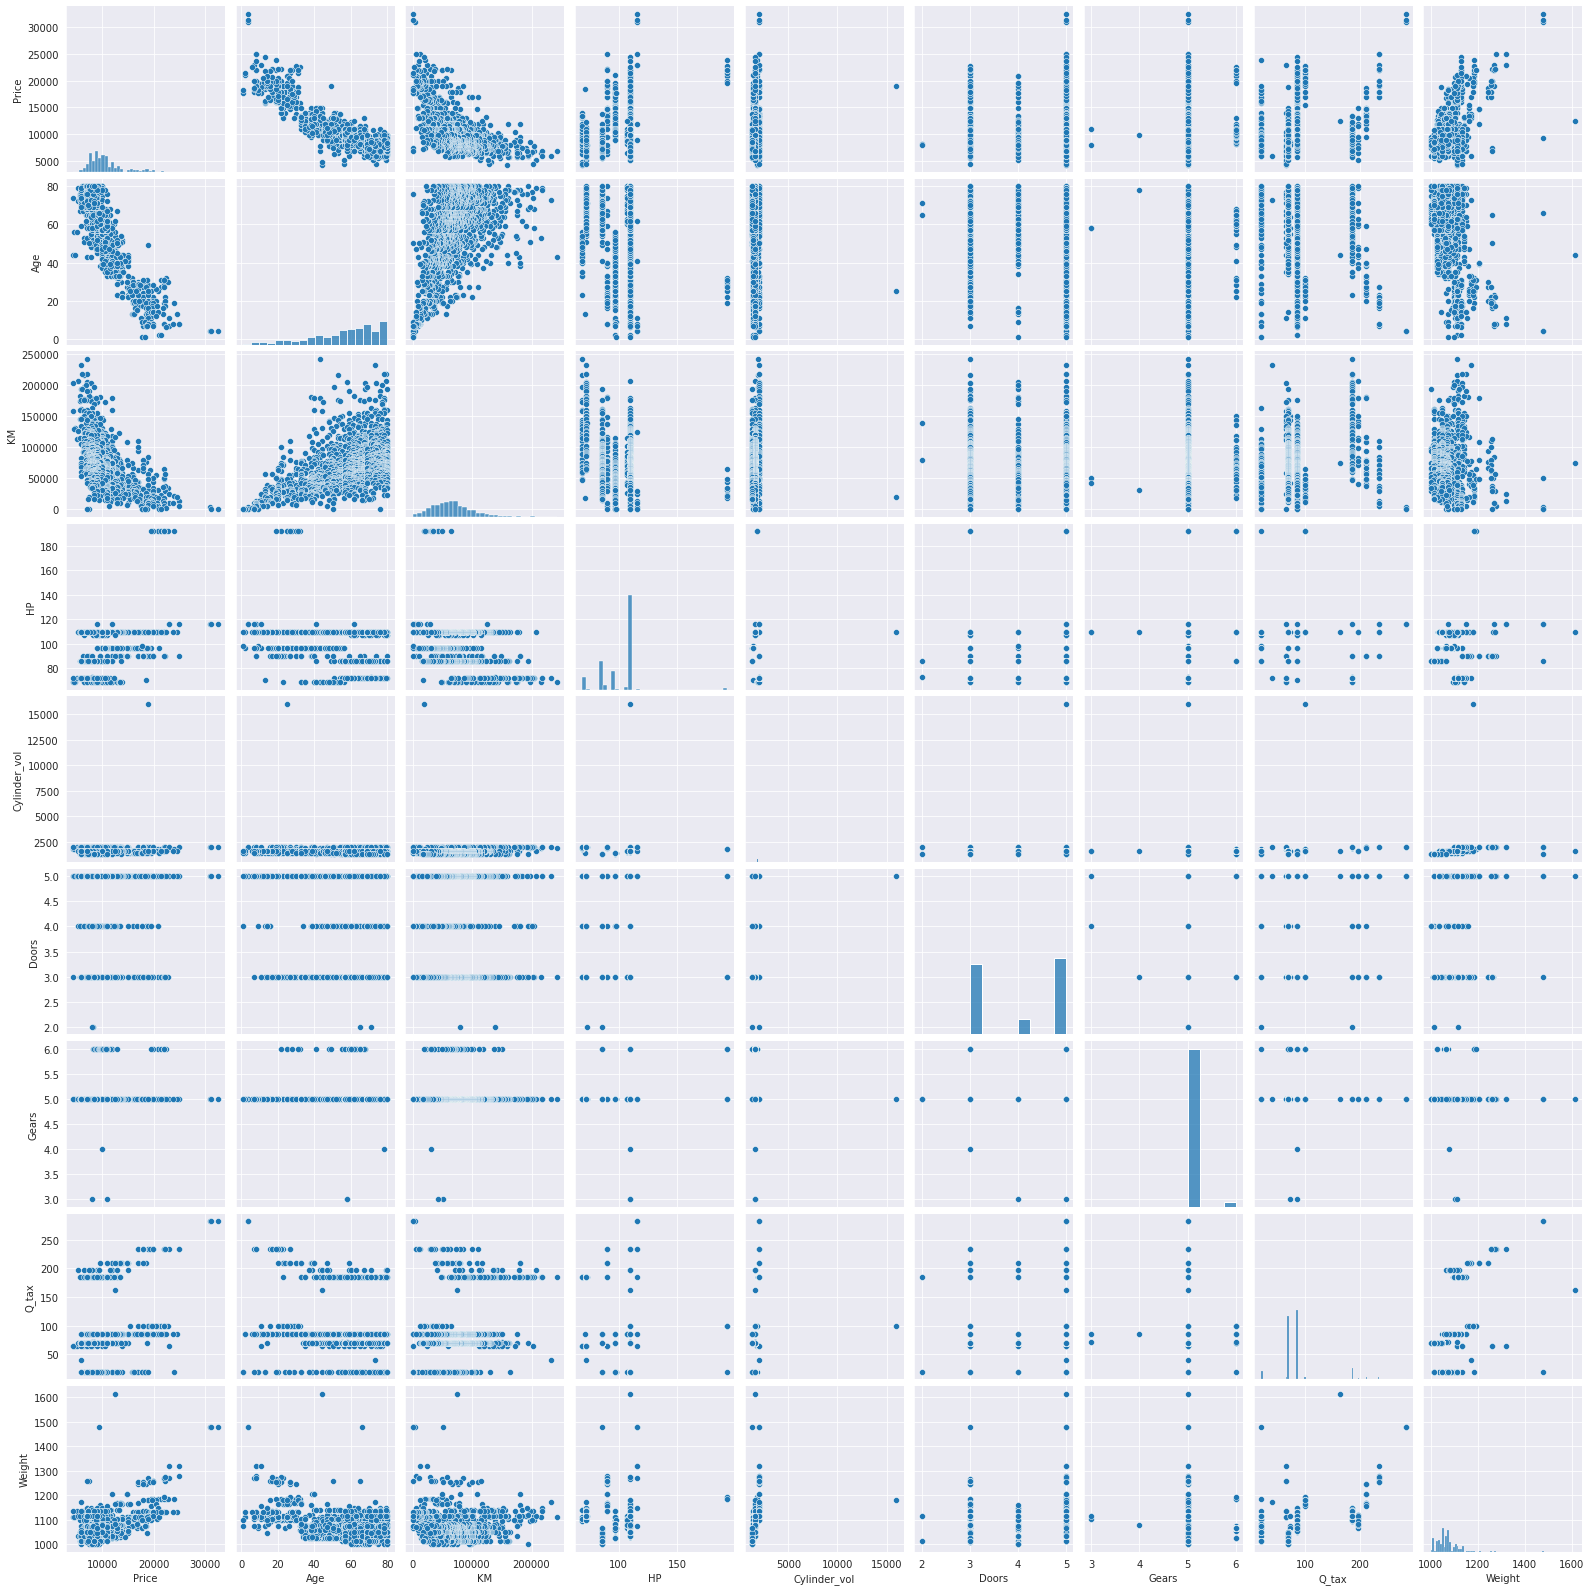

In [13]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(toyota2)


# **Standardizing data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
toyota_scale = scale.fit_transform(toyota)

In [ ]:
toyota_scale

array([[ 0.77036821, -1.77726827, -0.57595832, ..., -0.14047507,
         3.00351318,  1.77496405],
       [ 0.83966875, -1.77726827,  0.11647404, ..., -0.14047507,
         3.00351318,  1.77496405],
       [ 0.89510918, -1.72337979, -0.71670745, ..., -0.14047507,
         3.00351318,  1.77496405],
       ...,
       [-0.61564265,  0.80937864, -1.37562683, ..., -0.14047507,
        -0.44010431, -1.09674669],
       [-0.96214536,  0.75549016, -1.37829506, ..., -0.14047507,
        -0.44010431, -1.09674669],
       [-1.04530601,  1.07882103, -1.82962616, ..., -0.14047507,
        -1.66124526,  0.7985824 ]])

In [ ]:
toyota_df = pd.DataFrame(toyota_scale)
toyota_df.head()

,0,1,2,3,4,5,6,7,8
0,0.770368,-1.777268,-0.575958,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
1,0.839669,-1.777268,0.116474,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
2,0.895109,-1.723380,-0.716707,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
3,1.172311,-1.615603,-0.548902,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
4,0.839669,-1.400049,-0.802384,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.870688


In [ ]:
# Adding column names to data frame
toyota_df.columns=['Price',	'Age',	'KM',	'HP',	'Cylinder_vol',	'Doors',	'Gears',	'Q_tax',	'Weight']
toyota_df.head()

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,0.770368,-1.777268,-0.575958,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
1,0.839669,-1.777268,0.116474,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
2,0.895109,-1.723380,-0.716707,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
3,1.172311,-1.615603,-0.548902,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
4,0.839669,-1.400049,-0.802384,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.870688


# Preparing a model

In [14]:
#Build model
model = smf.ols('Price~Age+KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota2).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 31 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:12:02   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age           -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM              -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP              31.5846      2.818     11.210      0.000      26.058      37.112
Cylinder_vol    -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors           -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears          597.7159    196.969      3.035      0.002     211.335     984.097
Q_tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight          16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

In [17]:
#Coefficients
model.params

Intercept      -5472.540368
Age             -121.713891
KM                -0.020737
HP                31.584612
Cylinder_vol      -0.118558
Doors             -0.920189
Gears            597.715894
Q_tax              3.858805
Weight            16.855470
dtype: float64

**Cylinder_vol & Doors are insignificant as per pvalues**

# Simple Linear Regression Models

In [18]:
ml_C_vol=smf.ols('Price ~ Cylinder_vol',data = toyota2).fit()
#t and p-Values
print(ml_C_vol.tvalues, '\n', ml_C_vol.pvalues)

Intercept       24.879592
Cylinder_vol     4.745039
dtype: float64 
 Intercept       7.236022e-114
Cylinder_vol     2.292856e-06
dtype: float64


**Cylinder_vol is significant when taken independently**

In [19]:
ml_C_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           2.29e-06
Time:                        11:12:55   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     9053.5368    363.894     24.880      0.000    8339.715    9767.359
Cylinder_vol     1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
ml_D=smf.ols('Price ~ Doors',data = toyota2).fit()
#t and p-Values
print(ml_C_vol.tvalues, '\n', ml_C_vol.pvalues)  


Intercept       24.879592
Cylinder_vol     4.745039
dtype: float64 
 Intercept       7.236022e-114
Cylinder_vol     2.292856e-06
dtype: float64


In [21]:
ml_D.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           2.40e-12
Time:                        11:13:27   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Doors is also significant when taken independently**

## Building model using Cylinder_vol and Doors as independent variable
Price~Cylinder_vol+Doors

In [22]:
ml_C_D=smf.ols('Price~Cylinder_vol+Doors',data = toyota2).fit()  
print(ml_C_D.tvalues, '\n', ml_C_D.pvalues)  

Intercept       12.786341
Cylinder_vol     4.268006
Doors            6.752236
dtype: float64 
 Intercept       1.580945e-35
Cylinder_vol    2.101878e-05
Doors           2.109558e-11
dtype: float64


**Cylinder_vol & Doors are significant when taken collectively**

# Model Validation

# Calculating VIF values to check collinearty

In [23]:
rsq_Age = smf.ols('Age ~ KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM ~ Age+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP ~ KM+Age+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_CV = smf.ols('Cylinder_vol ~ KM+HP+Age+Doors+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_CV = 1/(1-rsq_CV)

rsq_D = smf.ols('Doors ~ KM+HP+Cylinder_vol+Age+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_D = 1/(1-rsq_D)

rsq_G = smf.ols('Gears ~ KM+HP+Cylinder_vol+Doors+Age+Q_tax+Weight',data=toyota2).fit().rsquared
vif_G = 1/(1-rsq_G)

rsq_QT = smf.ols('Q_tax ~ KM+HP+Cylinder_vol+Doors+Gears+Age+Weight',data=toyota2).fit().rsquared
vif_QT = 1/(1-rsq_QT)

rsq_W = smf.ols('Weight ~ KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Age',data=toyota2).fit().rsquared
vif_W = 1/(1-rsq_W)

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','Cylinder_vol', 'Doors', 'Gears', 'Q_tax', 'Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_CV, vif_D, vif_G, vif_QT,vif_W]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,Cylinder_vol,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Q_tax,2.295375
7,Weight,2.487180


In [ ]:
# All the variables have vif < 20, therfore no multicolinearty in variables.
# so we will consider all the variables in model building

# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

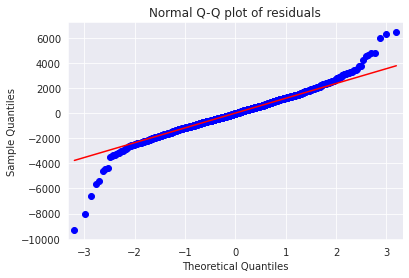

In [24]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [25]:
list(np.where(model.resid>6000))

[array([109, 146, 522])]

In [26]:
list(np.where(model.resid < -6000))

[array([220, 600, 959])]

## Residual Plot for Homoscedasticity

In [27]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()  # z = (x-mu)/sigma

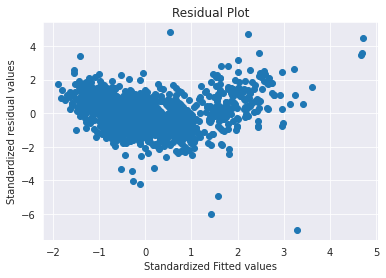

In [28]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Test for Errors (Residual Vs Regressors)

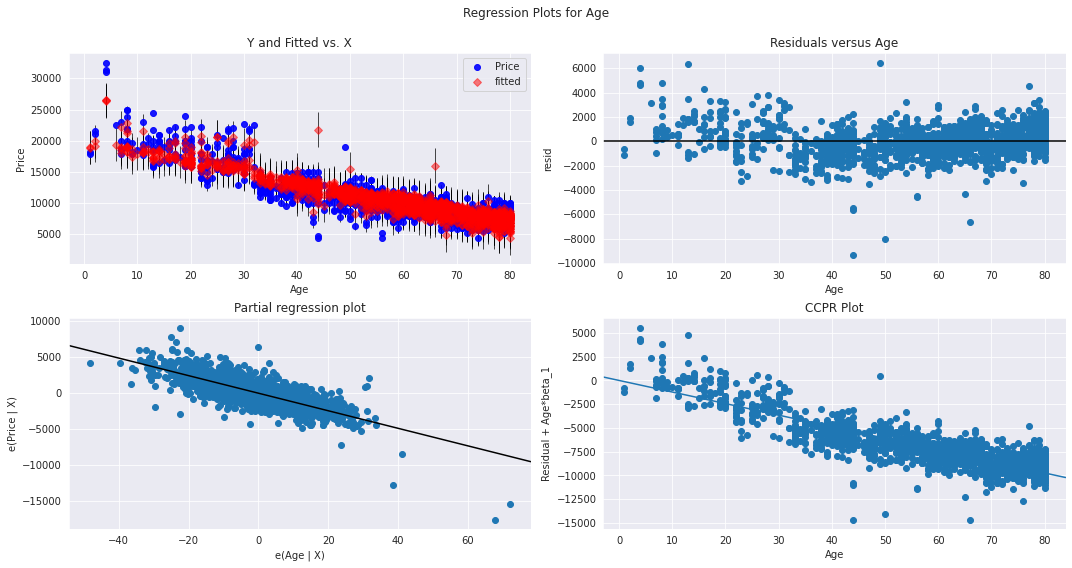

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

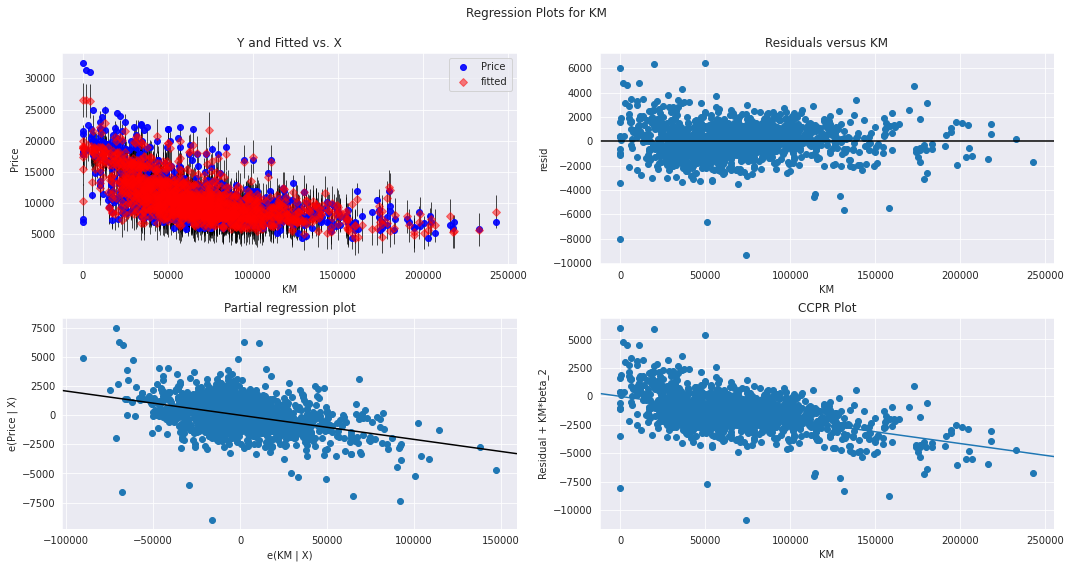

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

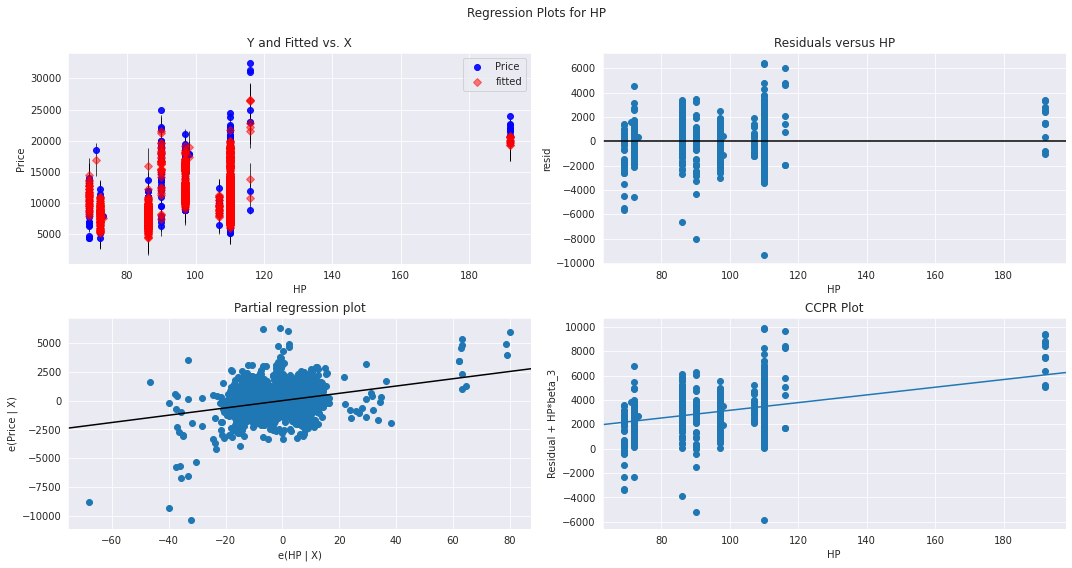

In [31]:
fig = plt.figure(figsize=(15,8))

fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

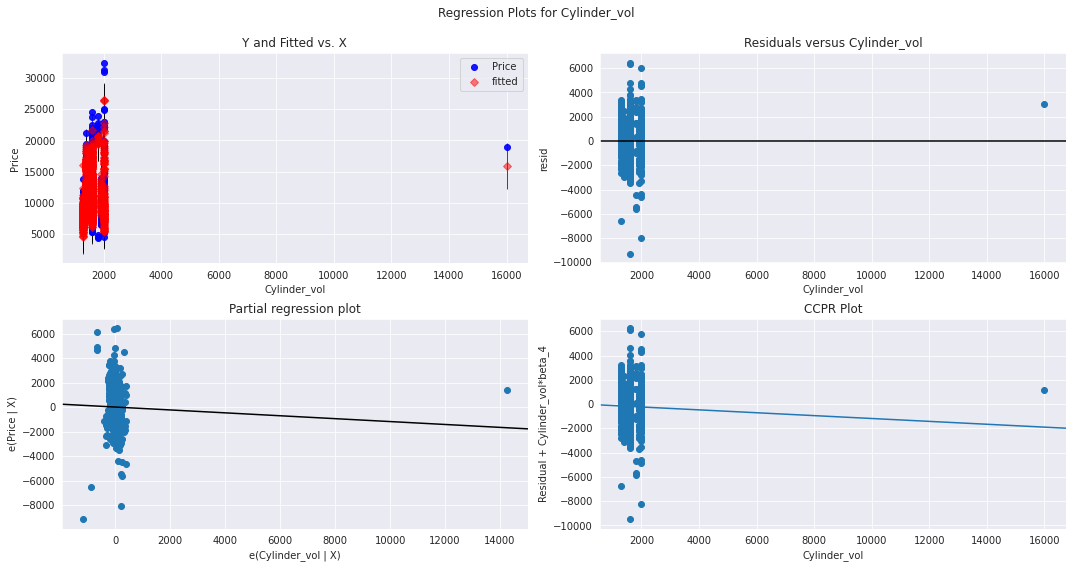

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Cylinder_vol", fig=fig)
plt.show()

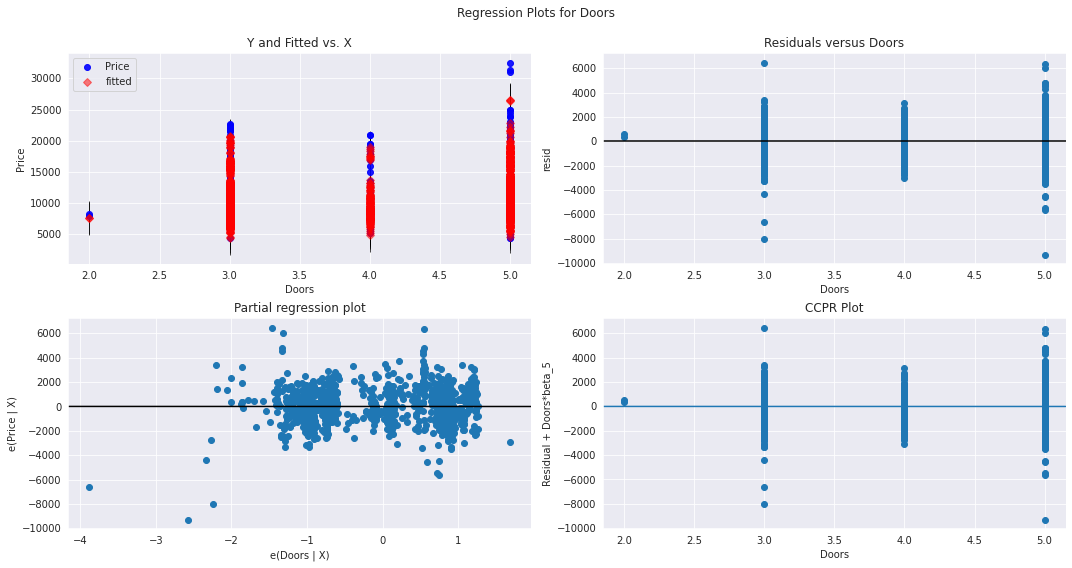

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

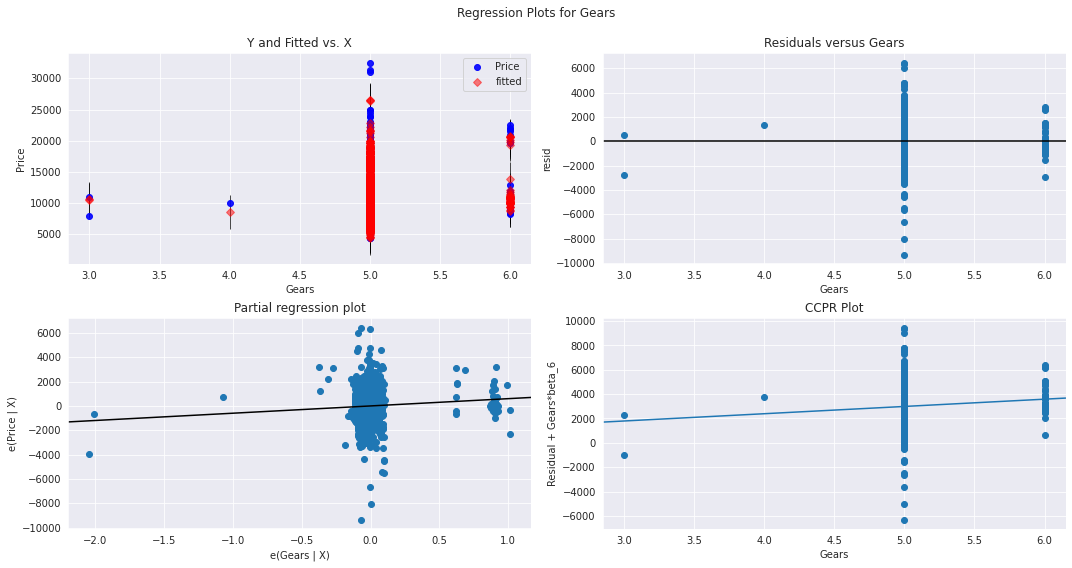

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

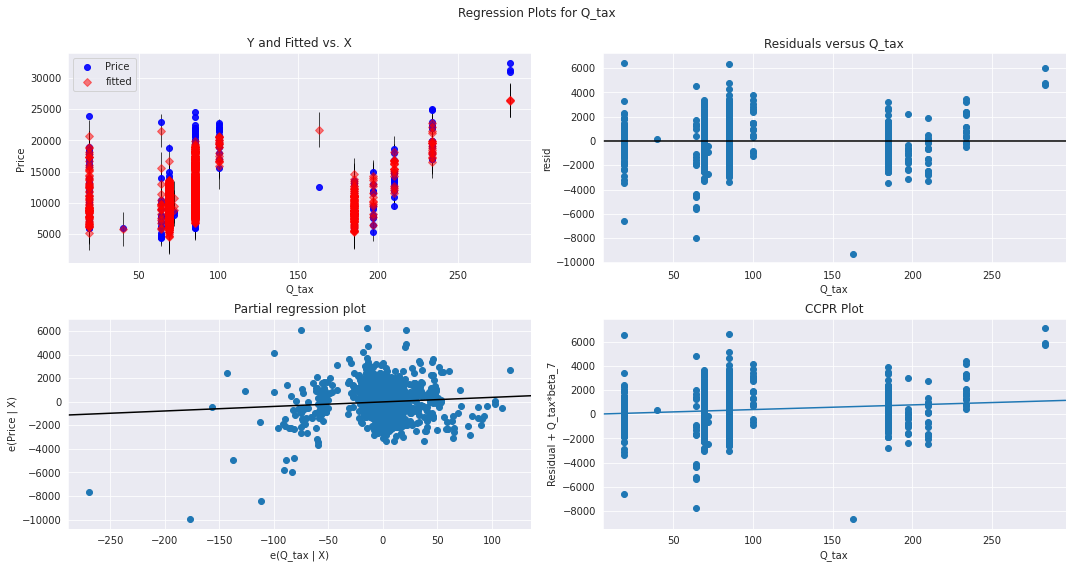

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Q_tax", fig=fig)
plt.show()

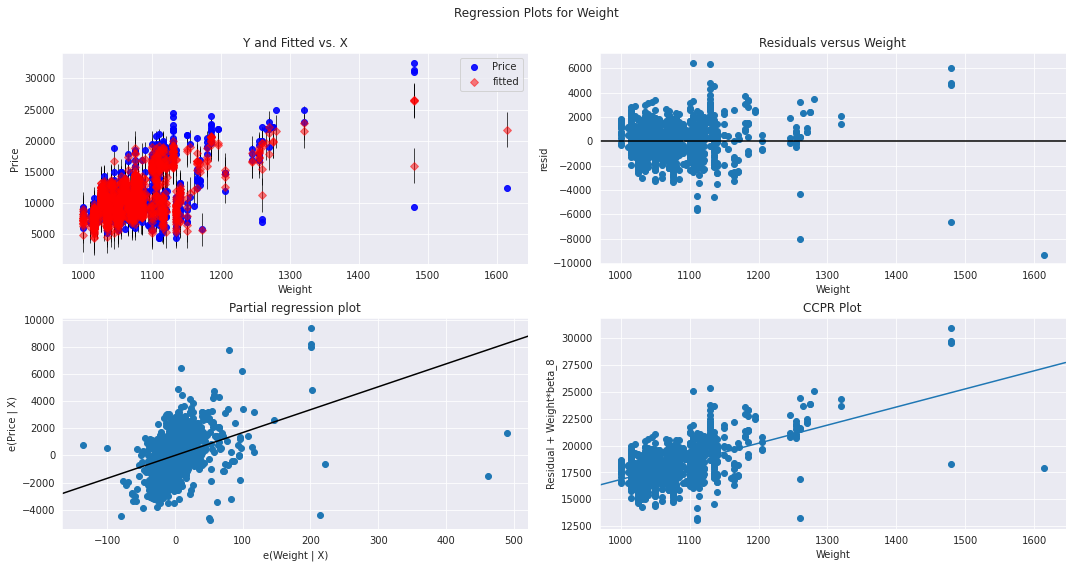

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [37]:
model_influence = model.get_influence() # get_influence() drived from our model i.e "model"
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


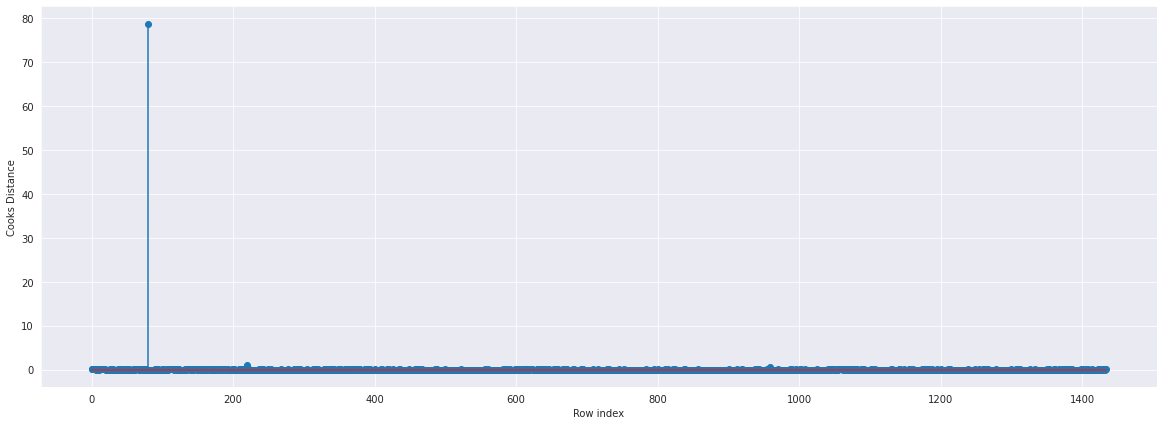

In [38]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
#index and value of influencer where c is more than 1
(np.argmax(c),np.max(c))

(80, 78.72950582259465)

## High Influence points ( Leverage value)

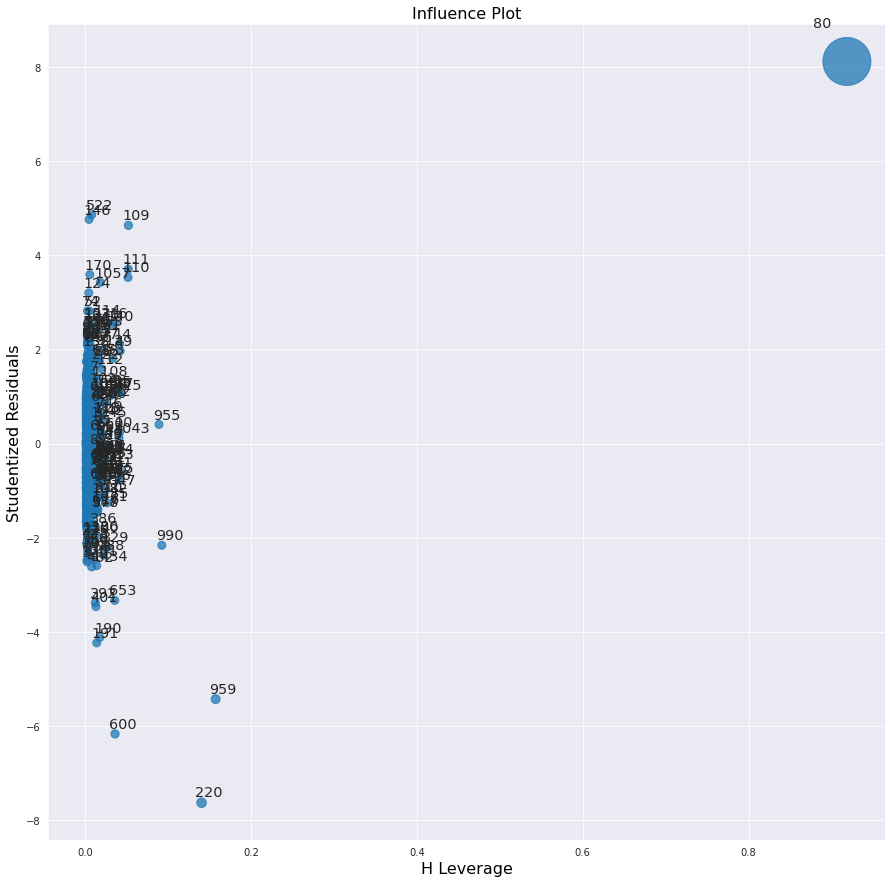

In [40]:
from statsmodels.graphics.regressionplots import influence_plot

fig,ax = plt.subplots(figsize=(15, 15))
influence_plot(model, ax= ax)
plt.show()

In [41]:
k = toyota2.shape[1] # K is no. of columns

n = toyota2.shape[0] # n is no. of rows
print(k, n)

leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff) 


9 1435
0.020905923344947737


**#### From the above plot, it is evident that data point 80 is the influencer**

In [42]:
toyota2[toyota2.index.isin([80])]

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [43]:
#See the differences in HP, Doors and other variable values
toyota2.head(15)

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


# Improving the model

check point

In [44]:
#Load the data
toyota3 = toyota2

In [45]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyota3=toyota3.drop(toyota3.index[[80]],axis=0).reset_index()

In [46]:
toyota3

,index,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1430,7500,69,20544,86,1300,3,5,69,1025
1430,1431,10845,72,19000,86,1300,3,5,69,1015
1431,1432,8500,71,17016,86,1300,3,5,69,1015
1432,1433,7250,70,16916,86,1300,3,5,69,1015


In [47]:
#Drop the original index
toyota3=toyota3.drop(['index'],axis=1)

In [48]:
toyota3.head()

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Rebuild Model

In [49]:
#Rebuild model and generate R-Squared and AIC values
#
model1 = smf.ols('Price~Age+KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota3).fit()

In [50]:
(model1.rsquared,model1.aic)

(0.8681163912634053, 24669.363894157)

##### Comparing above R-Square and AIC values with original model, we can conclude that accuracy of **model1** is high as compared to initial model named **model**

#Calculating Cook's Distance

In [51]:
model1_influence = model1.get_influence() # get_influence() drived from our model i.e 'model1"
(c1, _) = model1_influence.cooks_distance  # Cook’s Distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


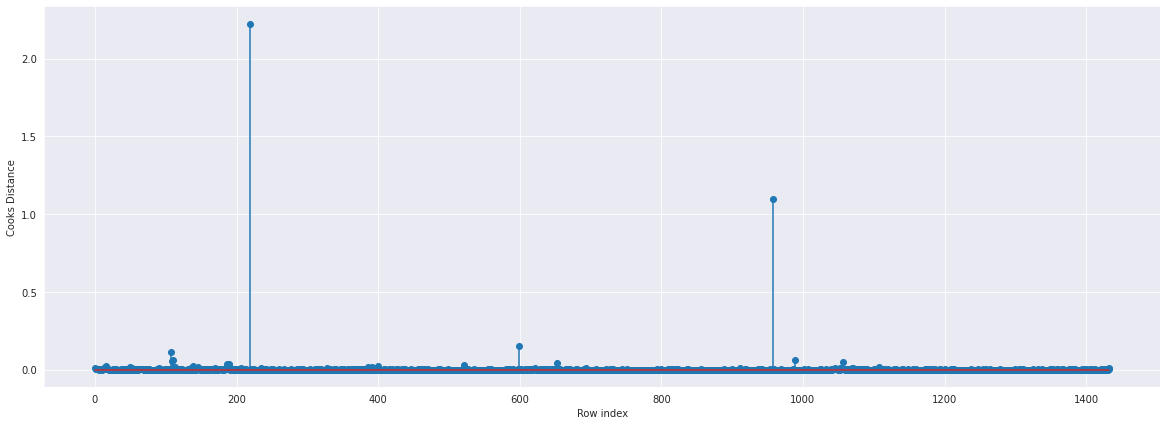

In [52]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota3)),np.round(c1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [53]:
#index of the data points where c is more than 1
(np.argmax(c1),np.max(c1))

(219, 2.225351365527531)

In [54]:
toyota3[toyota3.index.isin([219])]

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
219,12450,44,74172,110,1600,5,5,163,1615


In [56]:
#Drop 219th observation
#219th observation is outlier having value more than 1
toyota4 = toyota3
toyota4=toyota4.drop(toyota4.index[[219]],axis=0) 

In [57]:
toyota4

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [59]:
#Reset the index and re arrange the row values
toyota4=toyota4.reset_index()

In [60]:
toyota4

,index,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1428,1429,7500,69,20544,86,1300,3,5,69,1025
1429,1430,10845,72,19000,86,1300,3,5,69,1015
1430,1431,8500,71,17016,86,1300,3,5,69,1015
1431,1432,7250,70,16916,86,1300,3,5,69,1015


In [61]:
# drop the original index
toyota4=toyota4.drop(['index'],axis=1)

In [63]:
toyota4.head()

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Rebuild Model

In [64]:
#Build the model on the new data
model2 = smf.ols('Price~Age+KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota4).fit()
(model2.rsquared,model2.aic)

(0.8765926307402282, 24557.748263908954)

In [65]:
#Again check for influencers (Cook's Distance)
(c2, _) = model2.get_influence().cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


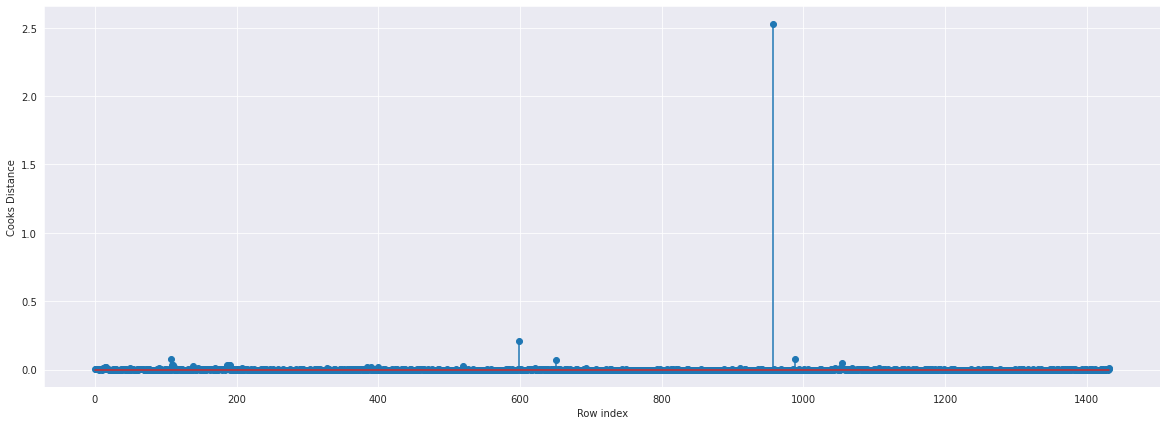

In [66]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota4)),np.round(c2,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [67]:
#index of the data points where c is more than 1
(np.argmax(c2),np.max(c2))

(957, 2.530779623278196)

In [68]:
toyota4[toyota4.index.isin([957])]

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
957,9390,66,50806,86,1300,3,5,19,1480


In [71]:
# Visualize the difference between 957th record and rest other records
toyota4.head()

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [73]:
#Drop 957th observation
#957th observation is outlier having cook's distance more than 1
toyota5 = toyota4
toyota5=toyota5.drop(toyota5.index[[957]],axis=0) 

In [74]:
toyota5

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [75]:
#Reset the index and re arrange the row values
toyota5=toyota5.reset_index()

In [77]:
toyota5

,index,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1427,1428,7500,69,20544,86,1300,3,5,69,1025
1428,1429,10845,72,19000,86,1300,3,5,69,1015
1429,1430,8500,71,17016,86,1300,3,5,69,1015
1430,1431,7250,70,16916,86,1300,3,5,69,1015


In [78]:
# drop the original index
toyota5=toyota5.drop(['index'],axis=1)

In [79]:
toyota5

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


# Rebuild model

In [83]:
#Build the model on the new data
model3 = smf.ols('Price~Age+KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota5).fit()
(model3.rsquared,model3.aic)

(0.8839684606741538, 24453.23573612724)

In [84]:
#Again check for influencers (Cook's Distance)

(c3, _) = model3.get_influence().cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


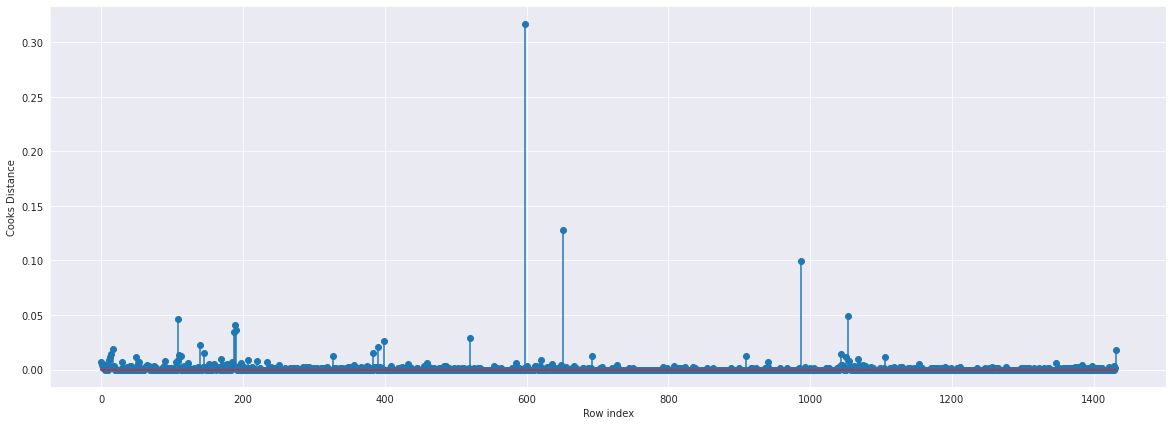

In [85]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota5)),np.round(c3,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [86]:
# Since cook's distance is < 1, therefore we stop the model deletion
(np.argmax(c3),np.max(c3))

(598, 0.31689035401452836)

**Since cook's distance = 0.31689 which is < 1, therefore we stop the model deletion and finalize the model**

# Final Model

In [ ]:
# model3 is our final model with
# rsquare = 0.8839684606741538, aic=24453.23573612724)

Thus the model accuracy improved to 88.396 %

# Model Prediction

In [89]:
# let the data for prediction is
pred_data=pd.DataFrame({'Age':6,"KM":40000,"HP":80,"Cylinder_vol":1800, "Doors":4,"Gears":5,"Q_tax": 350, "Weight":1304},index=[0])
pred_data

,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,6,40000,80,1800,4,5,350,1304


In [90]:
model3.predict(pred_data)

0    23593.052465
dtype: float64

In [91]:
# prediction for original data with 88% accuracy
pred_price = model3.predict(toyota1)
pred_price

0       16326.634426
1       15886.220972
2       16304.093367
3       15973.237208
4       15839.043084
            ...     
1431     9114.821644
1432     8499.169594
1433     8644.902871
1434     8758.662855
1435    10638.570082
Length: 1436, dtype: float64